In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import os, sys

from activation import *
from loss import *
from linear import * 
from encapsulage import *
from utils import *

In [5]:
# Création des données artificielles
X_train, y_train = generate_artificial_data(center=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)
X_test, y_test = generate_artificial_data(center=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)

y_train = np.where(y_train == -1, 0, 1).reshape((-1, 1))
y_test = np.where(y_test == -1, 0, 1).reshape((-1, 1))

def label_func(x):
    return np.where(x >= 0.5,1, 0)


# Création du réseau
net = Sequentiel([], labels=label_func)
net.add_module(Linear(X_train.shape[1], 20))
net.add_module(TanH())
net.add_module(Linear(20, 1))
net.add_module(Sigmoid())


# Initialisation de l'optimiseur
loss = MSELoss()
optim = Optim(net, loss, eps=1e-2)

# Entraînement avec SGD
batch_size = 200
epochs = 1000

mean, std  = optim.SGD(X_train, y_train, batch_size, epochs)


early stop best epoch :  0


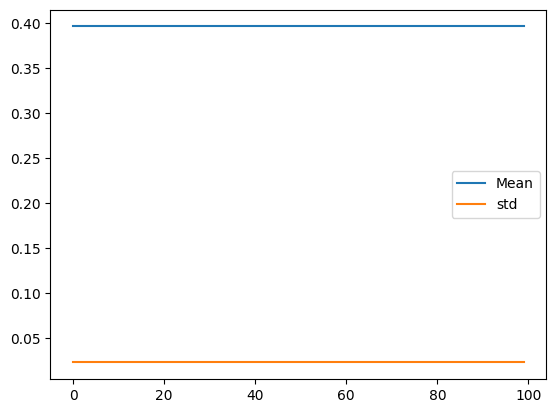

ValueError: y_pred et y_test doivent avoir la même forme.

In [9]:

plt.figure()
plt.plot(mean)
plt.plot(std)
plt.legend(('Mean', 'std'))
plt.show()


acc = optim.accuracy(X_train,y_train)
print("accuracy : ",acc)
plt.figure()
basic.plot_frontiere(X_train, opt.net.predict, step=100)
basic.plot_data(X_train, y_train.reshape(-1))
plt.title("accuracy = "+str(acc))
plt.show()

In [13]:
size = 500
datax, datay = generate_artificial_data(center=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)
testx, testy = generate_artificial_data(center=1, sigma=0.1, nbex=1000, data_type=1, epsilon=0.1)


datay = np.where(datay==-1,0,1).reshape((-1,1))
testy = np.where(testy==-1,0,1).reshape((-1,1))


n = datax.shape[1]
hidden = 80
hidden2 = 60
d = 1


iteration = 500
gradient_step = 1e-3
batchsize=10

def label_func(x):
    return np.where(x >= 0.5,1, 0)
    
loss_mse = MSELoss()
lin_layer = Linear(n, hidden,type=1)
lin_layer2 = Linear(hidden, hidden2,type=1)
lin_layer3 = Linear(hidden2, d,type=1)
lin_layer4 = Linear(40, 30,type=1)
lin_layer5 = Linear(30, d,type=1)
act_sig = Sigmoid()
act_tan = TanH()

net = Sequentiel([lin_layer,act_tan,lin_layer2,act_tan,lin_layer3,act_sig],labels=label_func)


opt = Optim(net,loss_mse,eps=gradient_step)
mean, std = opt.SGD(datax,datay,batchsize,iteration)
plt.figure()
plt.plot(mean)
plt.plot(std)
plt.legend(('Mean', 'std'))
plt.show()


acc = opt.score(datax,datay)
print("accuracy : ",acc)
plt.figure()
basic.plot_frontiere(datax, opt._net.predict, step=100)
basic.plot_data(datax, datay.reshape(-1))
plt.title("accuracy = "+str(acc))
plt.show()

TypeError: Linear.__init__() got an unexpected keyword argument 'type'